In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
from palettable.colorbrewer.qualitative import Pastel1_7
import datetime
from datetime import datetime
import folium

%matplotlib inline

In [3]:
copenhague = pd.read_csv("./listings-2.csv", sep=',')

In [4]:
copenhague.head() 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6983,Copenhagen 'N Livin',16774,Simon,NaN,Nrrebro,55.686410,12.547410,Entire home/apt,717,2,168,2019-07-19,1.10,1,22,0,NaN
1,26057,Lovely house - most attractive area,109777,Kari,NaN,Indre By,55.693071,12.576494,Entire home/apt,2400,4,56,2022-02-28,0.55,1,264,6,NaN
2,31094,"Very central and cozy, new kitchen",129976,Ebbe,NaN,Vesterbro-Kongens Enghave,55.665390,12.556390,Entire home/apt,750,2,17,2017-08-25,0.12,1,0,0,NaN
3,32379,"165 m2 artist flat on Vesterbro, with 2 bathr...",140105,Lise,NaN,Vesterbro-Kongens Enghave,55.672638,12.552493,Entire home/apt,1153,3,76,2021-10-18,0.54,2,0,3,NaN
4,32841,Cozy flat for Adults/Quiet for kids,142143,Anders & Maria,NaN,sterbro,55.711760,12.570910,Entire home/apt,617,100,7,2016-09-15,0.05,1,267,0,NaN


In [5]:
copenhague.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10250 entries, 0 to 10249
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              10250 non-null  int64  
 1   name                            10250 non-null  object 
 2   host_id                         10250 non-null  int64  
 3   host_name                       10245 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   10250 non-null  object 
 6   latitude                        10250 non-null  float64
 7   longitude                       10250 non-null  float64
 8   room_type                       10250 non-null  object 
 9   price                           10250 non-null  int64  
 10  minimum_nights                  10250 non-null  int64  
 11  number_of_reviews               10250 non-null  int64  
 12  last_review                     

In [6]:
copenhague.shape

(10250, 18)

In [20]:
#  elimino las columnas license y calculated_host_listings porque no las usaré en el análisis
copenhague = copenhague.drop(['license', 'calculated_host_listings_count'], axis=1) 

In [34]:
copenhague.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365,number_of_reviews_ltm
0,6983,Copenhagen 'N Livin',16774,Simon,NaN,Nrrebro,55.686410,12.547410,Entire home/apt,717,2,168,2019-07-19,1.10,22,0
1,26057,Lovely house - most attractive area,109777,Kari,NaN,Indre By,55.693071,12.576494,Entire home/apt,2400,4,56,2022-02-28,0.55,264,6
2,31094,"Very central and cozy, new kitchen",129976,Ebbe,NaN,Vesterbro-Kongens Enghave,55.665390,12.556390,Entire home/apt,750,2,17,2017-08-25,0.12,0,0
3,32379,"165 m2 artist flat on Vesterbro, with 2 bathr...",140105,Lise,NaN,Vesterbro-Kongens Enghave,55.672638,12.552493,Entire home/apt,1153,3,76,2021-10-18,0.54,0,3
4,32841,Cozy flat for Adults/Quiet for kids,142143,Anders & Maria,NaN,sterbro,55.711760,12.570910,Entire home/apt,617,100,7,2016-09-15,0.05,267,0


In [21]:
copenhague.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365,number_of_reviews_ltm
count,1.025000e+04,10250,1.025000e+04,10245,0.0,10250,10250.000000,10250.000000,10250,10250.000000,10250.000000,10250.000000,8697,8697.000000,10250.000000,10250.000000
unique,NaN,9920,NaN,2972,NaN,11,NaN,NaN,4,NaN,NaN,NaN,1265,NaN,NaN,NaN
top,NaN,Cozy apartment in the heart of Copenhagen,NaN,ApartmentinCopenhagen,NaN,Vesterbro-Kongens Enghave,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2022-03-27,NaN,NaN,NaN
freq,NaN,19,NaN,166,NaN,1712,NaN,NaN,8863,NaN,NaN,NaN,208,NaN,NaN,NaN
mean,3.171006e+16,NaN,9.121188e+07,NaN,NaN,NaN,55.679721,12.559250,NaN,1125.517951,4.683512,19.616000,NaN,0.622190,85.699805,3.587707
std,1.304938e+17,NaN,1.121415e+08,NaN,NaN,NaN,0.019858,0.032001,NaN,2295.310391,18.415440,37.260139,NaN,0.856332,113.792660,8.971663
min,6.983000e+03,NaN,1.171800e+04,NaN,NaN,NaN,55.615190,12.447650,NaN,75.000000,1.000000,0.000000,NaN,0.010000,0.000000,0.000000
25%,1.421509e+07,NaN,1.162089e+07,NaN,NaN,NaN,55.666110,12.542102,NaN,650.000000,2.000000,2.000000,NaN,0.170000,0.000000,0.000000
50%,3.139912e+07,NaN,3.917000e+07,NaN,NaN,NaN,55.680325,12.556990,NaN,899.000000,3.000000,8.000000,NaN,0.360000,23.000000,1.000000
75%,4.601892e+07,NaN,1.378751e+08,NaN,NaN,NaN,55.694472,12.581125,NaN,1200.000000,4.000000,22.000000,NaN,0.750000,146.000000,4.000000


In [35]:
# reemplazo los valores nulos de los precios por la media de los precios de la columna
copenhague['price'] = copenhague['price'].replace(0,np.median(copenhague['price']))

In [36]:
# VEO EN QUÉ COLUMNAS HAY NULOS
copenhague.isnull().sum()

id                           0
name                         0
host_id                      0
host_name                    5
neighbourhood_group      10250
neighbourhood                0
latitude                     0
longitude                    0
room_type                    0
price                        0
minimum_nights               0
number_of_reviews            0
last_review               1553
reviews_per_month         1553
availability_365             0
number_of_reviews_ltm        0
dtype: int64

In [46]:
# quiero ver las reseñas para saber desde cuando son los datos, le aplico datetime para que lo pueda leer bien
copenhague['last_review'] = copenhague['last_review'].apply(pd.to_datetime)

In [52]:
copenhague['last_review'] = copenhague['last_review'].apply(pd.to_datetime)   
copenhague.last_review.min()   # esta es la primera reseña

Timestamp('2013-06-30 00:00:00')

In [57]:
# las primeras reseñas empiezan en 2013, así que sé que desde está fecha hay los datos
reseñas = copenhague[copenhague['last_review'].dt.year == 2013] 
reseñas.groupby('neighbourhood').sum().reset_index()

,neighbourhood,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_of_reviews_ltm
0,Amager st,1534974,1386103,0.0,55.65625,12.60971,999,2,1,0.01,365,0
1,Brnshj-Husum,1372318,7439160,0.0,55.71387,12.45995,400,30,1,0.01,0,0
2,Indre By,691317,3231818,0.0,55.68789,12.59094,2000,3,10,0.09,103,0
3,Nrrebro,339321,1720468,0.0,55.69091,12.55490,719,3,29,0.24,0,0
4,Vesterbro-Kongens Enghave,1493258,8086180,0.0,111.34031,25.11150,4171,8,19,0.15,364,0
5,sterbro,1655654,8777661,0.0,55.71142,12.55690,1250,2,1,0.01,0,0


11


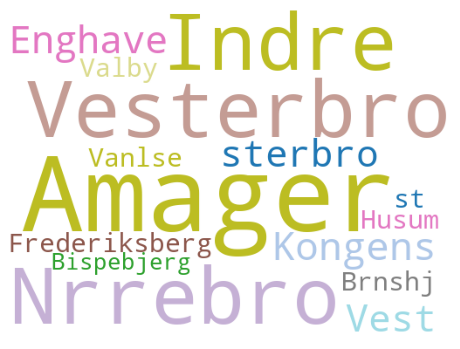

In [37]:
# NOMBRE DE TODOS LOS BARRIOS
print(copenhague.neighbourhood.nunique()) 
nombre_barrios= copenhague.neighbourhood.unique() 
plt.subplots(figsize=(8,8))       
wordcloud = WordCloud(
            background_color='white', 
            width=512,               
            height=384,  colormap='tab20',).generate("  ".join(nombre_barrios)) 
plt.imshow(wordcloud)
plt.axis('off');      
plt.savefig('./img/nombre_barrios_copenhague.png') 

In [25]:
barrio_menos_recurrente = copenhague['neighbourhood'].value_counts()
barrio_menos_recurrente = barrio_menos_recurrente[barrio_menos_recurrente < 300]
df =pd.DataFrame(barrio_menos_recurrente).reset_index()
df

,index,neighbourhood
0,Vanlse,247
1,Brnshj-Husum,226


          index  neighbourhood
0        Vanlse            247
1  Brnshj-Husum            226


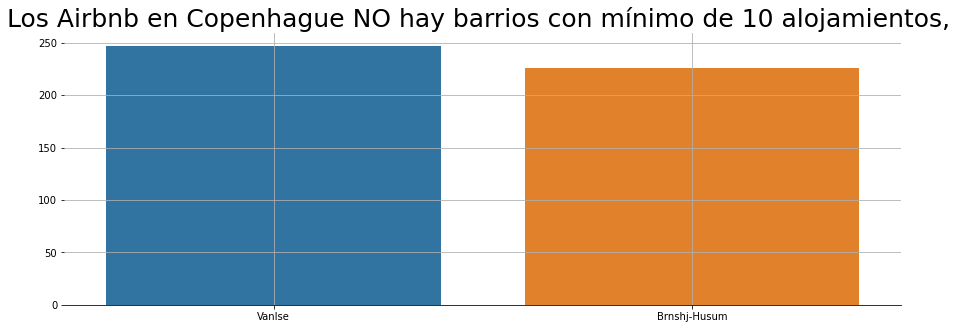

In [60]:
# quiero ver los barrios con menos de 10 alojamientos, pero en Copenhague el mínimo es a partir de 226
barrio_menos_recurrente = copenhague['neighbourhood'].value_counts()
barrio_menos_recurrente = barrio_menos_recurrente[barrio_menos_recurrente < 300]
df =pd.DataFrame(barrio_menos_recurrente).reset_index()
print(df)
plt.figure(figsize=(15, 5))
sns.barplot(x = df['index'], y = df['neighbourhood'], data = df)
sns.despine(left = True)
plt.title('Los Airbnb en Copenhague NO hay barrios con mínimo de 10 alojamientos, ', size=25)
plt.xlabel('')
plt.ylabel('')
plt.grid();
plt.savefig('./img/barrio_menos_concurrente_10_cop.png')

In [28]:
# quiero ver el barrio más recurrente
barrio_mas_recurrente = copenhague['neighbourhood'].value_counts()
mask = barrio_mas_recurrente == barrio_mas_recurrente.max()
barrio_mas_recurrente[mask]

Vesterbro-Kongens Enghave    1712
Name: neighbourhood, dtype: int64

In [61]:
copenhague['neighbourhood'].value_counts()


Vesterbro-Kongens Enghave    1712
Indre By                     1706
Nrrebro                      1610
sterbro                      1096
Frederiksberg                1062
Amager Vest                   989
Amager st                     744
Valby                         437
Bispebjerg                    421
Vanlse                        247
Brnshj-Husum                  226
Name: neighbourhood, dtype: int64

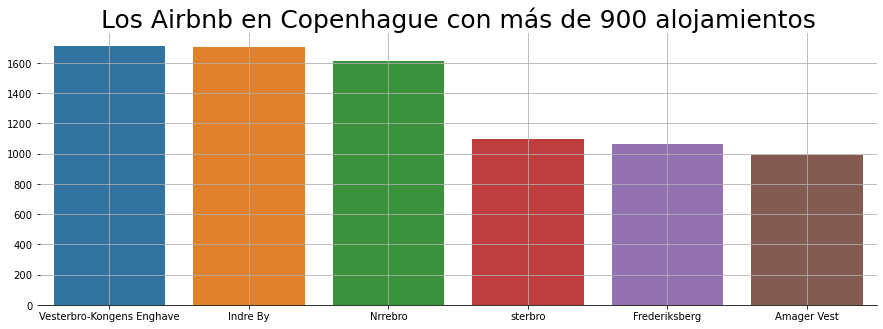

In [62]:
#Los barrios con más Airbnbs
barrio_mas_recurrente = copenhague['neighbourhood'].value_counts()
barrio_mas_recurrente = barrio_mas_recurrente[barrio_mas_recurrente > 900]
df =pd.DataFrame(barrio_mas_recurrente).reset_index()

counts= barrio_mas_recurrente

plt.figure(figsize=(15, 5))
sns.barplot(x = df['index'], y = df['neighbourhood'], data = df)
plt.xticks()
sns.despine(left = True)
plt.title('Los Airbnb en Copenhague con más de 900 alojamientos', size=25)
plt.xlabel('')
plt.ylabel('')
plt.grid();
plt.savefig('./img/barrio_mas_concurrente_cop.png')

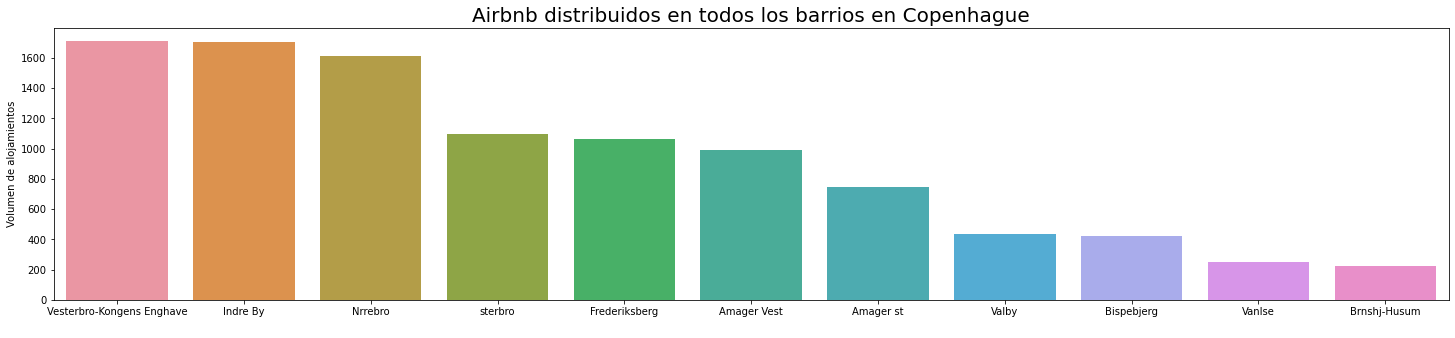

In [31]:
# Visualización de todos los barrios en general
plt.figure(figsize=(25, 5))
sns.countplot(x = 'neighbourhood', data=copenhague, order = copenhague['neighbourhood'].value_counts().index)

plt.title("Airbnb distribuidos en todos los barrios en Copenhague", fontsize= 20)
plt.xlabel(" ")
plt.ylabel("Volumen de alojamientos")
#plt.xticks(rotation = -15);
plt.savefig('alojamiento_por_barrios_10_cop.png')

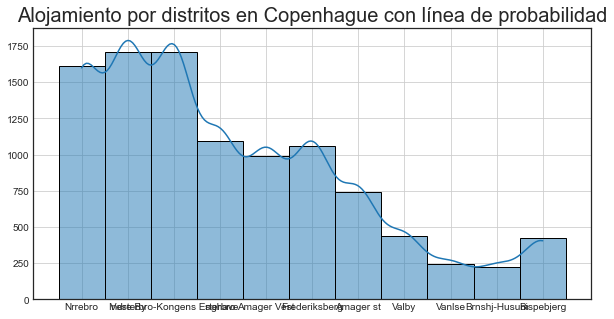

In [ ]:
# los alojamientos por distrito con la línea de probabilidad
fig = plt.figure(figsize=(10,5))
sns.histplot(copenhague["neighbourhood"],
kde = True,  
palette='Pastel2_r')
plt.title("Alojamiento por distritos en Copenhague con línea de probabilidad", fontsize= 20)
plt.xlabel('')
plt.ylabel('')
plt.grid();
plt.savefig('./img/alojamiento_por_distritos_probabilidad.png') 

In [ ]:
# quiero empezar a analizar los precios

                neighbourhood  price
4               Frederiksberg    185
8                      Vanlse    185
10                    sterbro    154
1                   Amager st    136
7                       Valby    127
3                Brnshj-Husum    124
2                  Bispebjerg    120
6                     Nrrebro    103
9   Vesterbro-Kongens Enghave     90
0                 Amager Vest     76
5                    Indre By     75


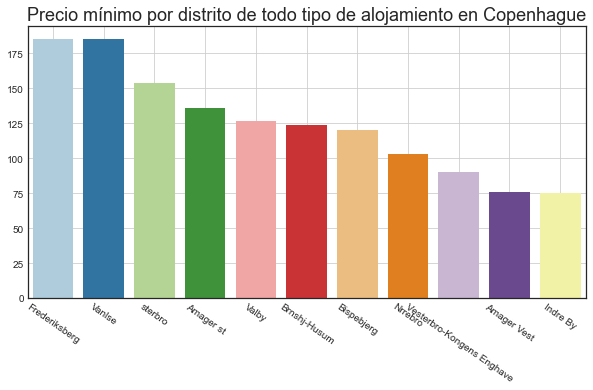

In [ ]:
# quiero ver el precio mínimo por distrito
d = copenhague.groupby('neighbourhood')[['price']].min().reset_index().sort_values(by=['price'], ascending=False)  
print(d)
plt.figure(figsize=(10, 5))
sns.barplot(x="neighbourhood", y="price", data=d, palette='Paired')
plt.grid()
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation = -35);
plt.title('Precio mínimo por distrito de todo tipo de alojamiento en Copenhague', fontsize= 18);
plt.savefig('./img/precio_min_distrito.png') 

                neighbourhood   price
5                    Indre By  100000
0                 Amager Vest   64900
6                     Nrrebro   63100
4               Frederiksberg   62000
9   Vesterbro-Kongens Enghave   62000
1                   Amager st   50000
2                  Bispebjerg   44000
7                       Valby   20000
10                    sterbro   20000
8                      Vanlse   10000
3                Brnshj-Husum    4464


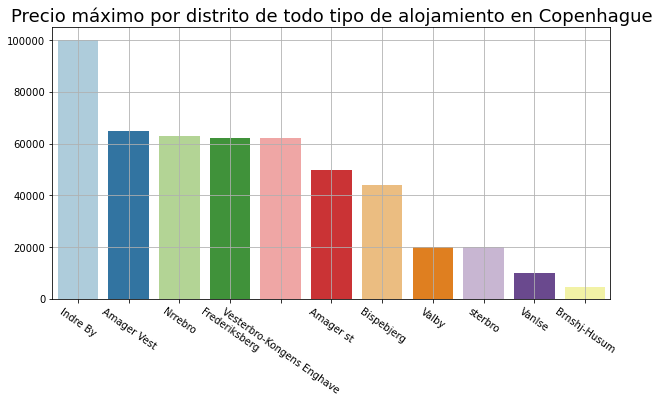

In [63]:
# quiero ver el precio máximo por distrito
d = copenhague.groupby('neighbourhood')[['price']].max().reset_index().sort_values(by=['price'], ascending=False) 
print(d)

plt.figure(figsize=(10, 5))
sns.barplot(x="neighbourhood", y="price", data=d, palette='Paired')
plt.grid()
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation = -35);
plt.title('Precio máximo por distrito de todo tipo de alojamiento en Copenhague', fontsize= 18);
plt.savefig('./img/precio_max_distrito_todos_aloj.png') 

                neighbourhood        price
5                    Indre By  1571.498242
0                 Amager Vest  1200.071790
4               Frederiksberg  1157.895480
10                    sterbro  1085.869526
9   Vesterbro-Kongens Enghave  1067.119159
1                   Amager st  1010.317204
7                       Valby   965.700229
6                     Nrrebro   938.339752
3                Brnshj-Husum   840.615044
2                  Bispebjerg   828.463183
8                      Vanlse   804.979757


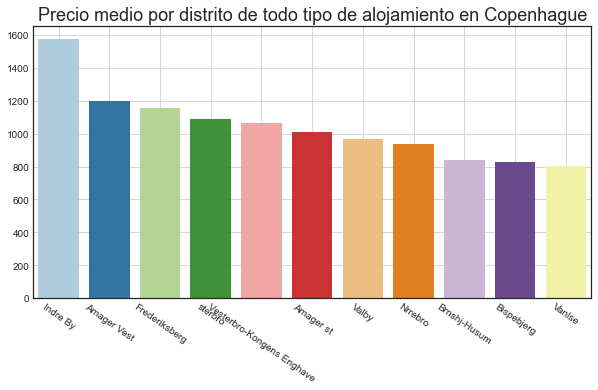

In [ ]:
# VISUALIZACIÓN POR DISTRITO LA MEDIA DE LOS PRECIOS
d = copenhague.groupby('neighbourhood')[['price']].mean().reset_index().sort_values(by=['price'], ascending=False) 
print(d)
plt.figure(figsize=(10, 5))
sns.barplot(x="neighbourhood", y="price", data=d, palette='Paired')
plt.grid()
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation = -35);
plt.title('Precio medio por distrito de todo tipo de alojamiento en Copenhague', fontsize= 18);
plt.savefig('./img/precio_media_distrito.png') 

/var/folders/wx/274cwf0567bfr403dd670hhr0000gn/T/ipykernel_16066/1550325100.py:3: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.

/var/folders/wx/274cwf0567bfr403dd670hhr0000gn/T/ipykernel_16066/1550325100.py:5: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.



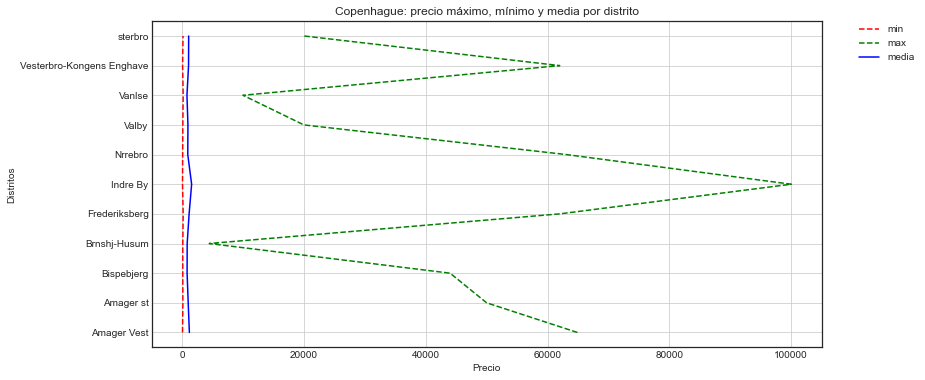

In [ ]:
# precios maximos, minimos y media por distrito
precio_distrito = copenhague.groupby('neighbourhood')
precio_min_distrito= precio_distrito.min()['price']
precio_distrito = copenhague.groupby('neighbourhood')
precio_max_distrito= precio_distrito.max()['price']
precio_distrito = copenhague.groupby('neighbourhood')
precio_mean_distrito= precio_distrito.mean()['price']

plt.style.use("seaborn-white")
plt.figure(figsize=(12,6)) 
plt.plot(precio_min_distrito, precio_min_distrito.index, linestyle = "--", color="r", label = "min")
plt.plot(precio_max_distrito, precio_max_distrito.index, linestyle = "--", color="g", label = "max")
plt.plot(precio_mean_distrito, precio_mean_distrito.index, linestyle = "-", color="b", label = "media")
plt.title("Copenhague: precio máximo, mínimo y media por distrito")
plt.xlabel("Precio")
plt.ylabel("Distritos")
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);
plt.savefig('./img/junto_min_max_precio_distrito.png') 

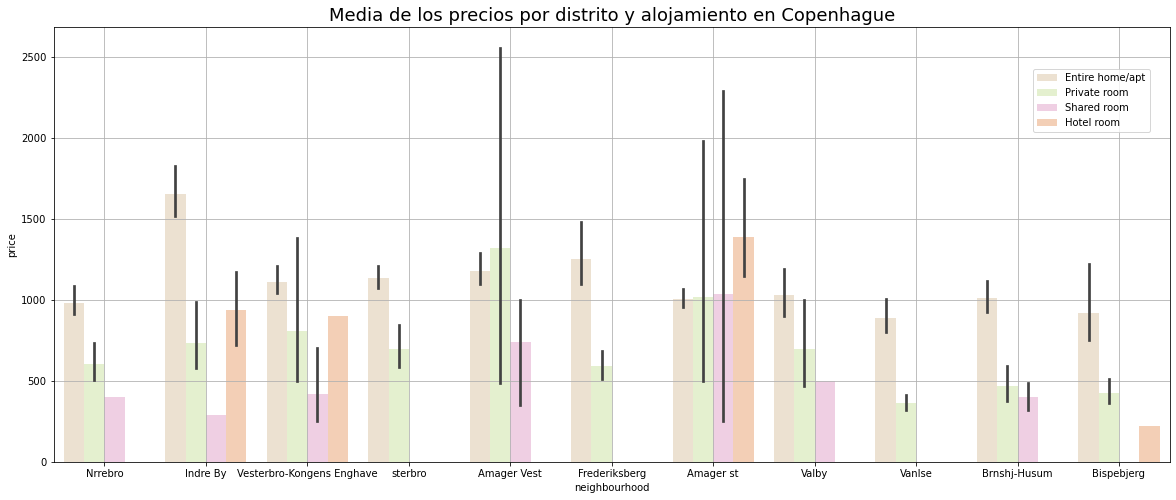

In [64]:
# visualizo agrupo por los distintos apartamentos y diferentes alojamientos la media de los precios, no la he usado en la presentación
plt.figure(figsize=(20, 8))
sns.barplot(x="neighbourhood", y="price", hue= 'room_type', data=copenhague, palette='Pastel2_r')
plt.grid()
plt.legend(bbox_to_anchor=(1., .95), loc='upper right', borderaxespad=2.)
plt.title('Media de los precios por distrito y alojamiento en Copenhague', fontsize= 18);
plt.savefig('./img/media_precio_distrito_alojamiento_cop.png')

In [ ]:
copenhague.room_type.value_counts()

Entire home/apt    8863
Private room       1340
Hotel room           27
Shared room          20
Name: room_type, dtype: int64

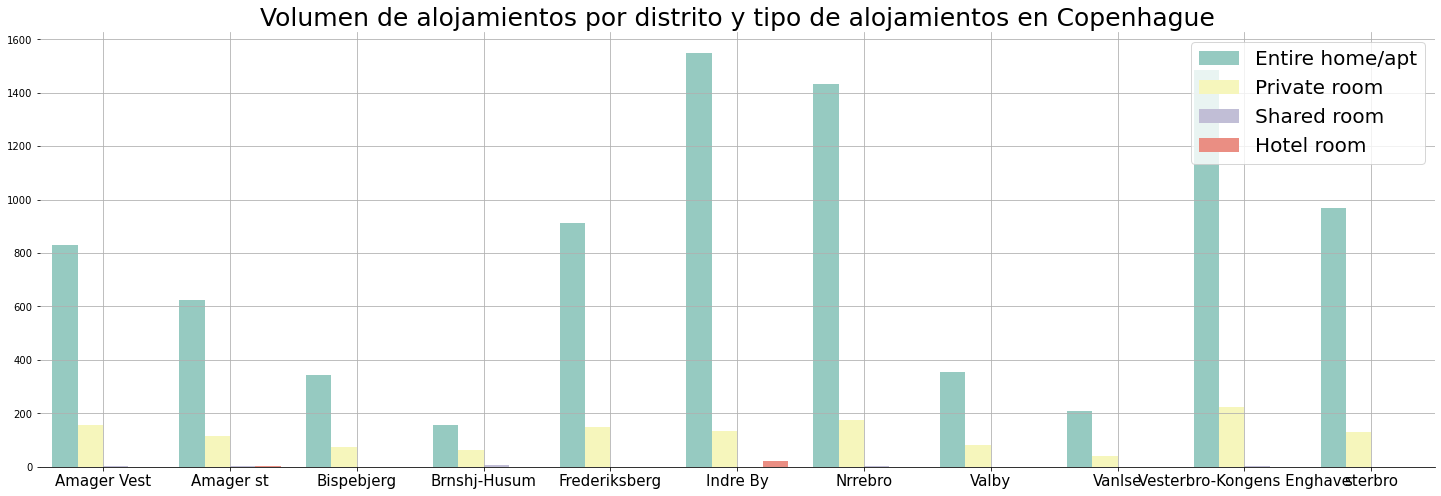

In [68]:
# quiero ver por distrito que tipo de apartamento hay más, Está bien
# agrupo por tipo de habitación, tipo de distrito y usaré de referencia el host_id porque lo que devuelve es númerico no como el host name, pruebas
apartamento_por_distrito = pd.DataFrame(copenhague[['host_id','room_type','neighbourhood']].groupby(['neighbourhood','room_type']).host_id.count().reset_index())
apartamento_por_distrito
plt.figure(figsize=(25, 8))
sns.barplot( x="neighbourhood", y="host_id", data=apartamento_por_distrito, hue ='room_type', palette='Set3')
plt.grid()
plt.title('Volumen de alojamientos por distrito y tipo de alojamientos en Copenhague', size=25)
plt.legend(loc="upper right",  fontsize= 20)
sns.despine(left = True)
plt.xticks(size=15, color= 'k')
plt.xlabel('')
plt.ylabel('')
# sns.despine(left = True);
plt.savefig('./img/volumen_alojamiento_distrito_cop.png') 

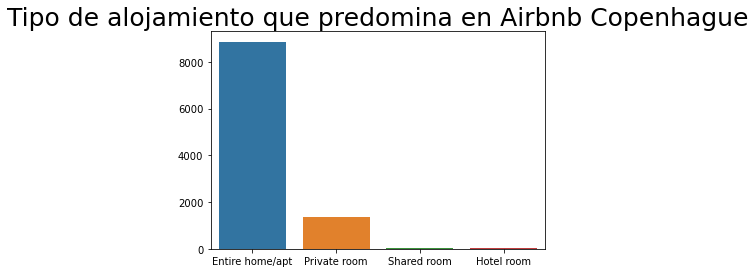

In [69]:
# visualizo qué tipo de alojamiento hay más
sns.countplot(x = 'room_type', data=copenhague)
plt.xlabel('')
plt.ylabel('')
plt.title('Tipo de alojamiento que predomina en Airbnb Copenhague', size=25);
#plt.xticks(rotation = -45);
plt.savefig('./img/volumen_alojamiento_distrito_copp.png') # se guarda la imagen

In [66]:
copenhague.room_type.value_counts()

Entire home/apt    8863
Private room       1340
Hotel room           27
Shared room          20
Name: room_type, dtype: int64

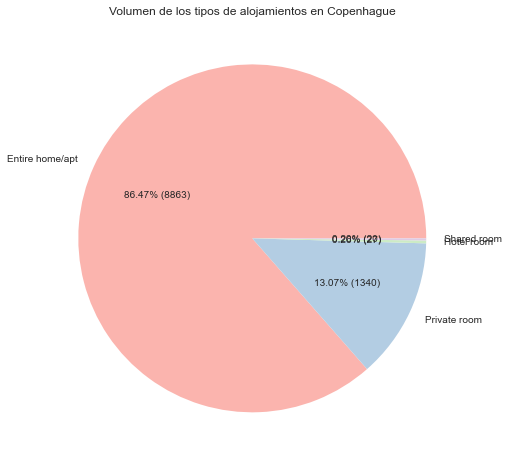

In [ ]:
# QUE TIPO DE ALOJAMIENTO HAY MÁS, EL QUE MÁS HAY ES APARTAMENTO ENTERO, otra forma de ver el de ariba
tipo_apartamento = copenhague['room_type'].value_counts()
def autopct_fun(abs_values): 
    val = iter(abs_values)
    return lambda pct: f"{pct:.2f}% ({next(val)})"
counts = tipo_apartamento
my_circle=plt.Circle( (0,0), 0.5, color='white') 
plt.figure(figsize=(8,8))
plt.pie(tipo_apartamento.values,labels=tipo_apartamento.index, autopct=autopct_fun(counts), colors=Pastel1_7.hex_colors)
plt.title("Volumen de los tipos de alojamientos en Copenhague");
#plt.savefig('max_alojamiento_distrito.png') 

In [ ]:
# observo las descripciones general de los precios
copenhague.price.describe()

count     10250.000000
mean       1125.517951
std        2295.310391
min          75.000000
25%         650.000000
50%         899.000000
75%        1200.000000
max      100000.000000
Name: price, dtype: float64

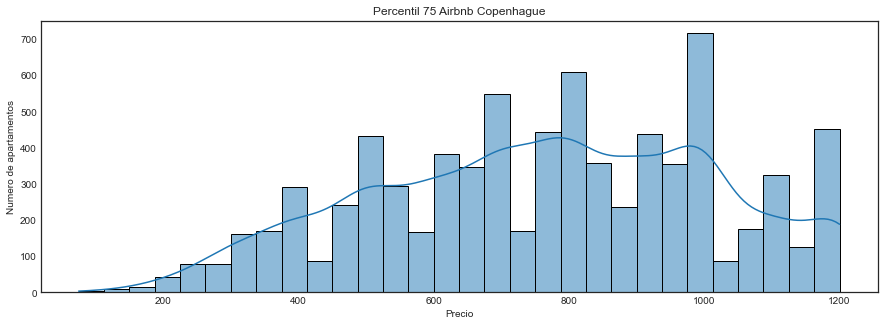

In [ ]:
# Visualizo como está distribuido el percentil 75 
inferior_150 = copenhague[copenhague['price']<=1200] 
plt.figure(figsize=(15,5))
sns.histplot(x='price', data=inferior_150, kde=True, palette='Pastel2_r')
plt.title('Percentil 75 Airbnb Copenhague')
plt.xlabel("Precio")
plt.ylabel("Numero de apartamentos");
plt.savefig('./img/alojamientos_precio_percentil_75.png') # se guarda la imagen

         room_type        price
0  Entire home/apt  1182.762270
1       Hotel room   959.074074
2     Private room   758.850746
3      Shared room   549.100000


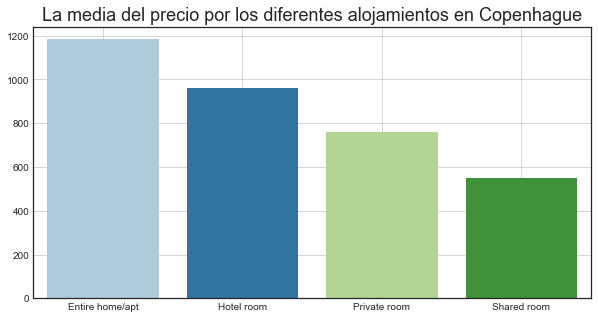

In [ ]:
# LA media por los diferentes apartamentos
d = copenhague.groupby('room_type')[['price']].mean().reset_index().sort_values(by=['price'], ascending=False) 
print(d)

plt.figure(figsize=(10, 5))
sns.barplot(x="room_type", y="price", data=d, palette='Paired')
plt.title('La media del precio por los diferentes alojamientos en Copenhague', fontsize= 18)
plt.grid()
plt.xlabel('')
plt.ylabel('');
plt.savefig('./img/precio_medio_por_alojamiento_cop.png')


In [ ]:
d = copenhague.groupby('room_type')[['price']].describe()
print(d)

                  price                                                  \
                  count         mean          std    min     25%    50%   
room_type                                                                 
Entire home/apt  8863.0  1182.762270  2103.146525   75.0  720.00  950.0   
Hotel room         27.0   959.074074   532.977047  178.0  496.50  926.0   
Private room     1340.0   758.850746  3298.646159  103.0  343.00  450.0   
Shared room        20.0   549.100000   458.432214  250.0  303.75  400.0   

                                    
                     75%       max  
room_type                           
Entire home/apt  1250.00  100000.0  
Hotel room       1310.00    1921.0  
Private room      589.25   64900.0  
Shared room       570.00    2291.0  


         room_type   price
0  Entire home/apt  100000
2     Private room   64900
3      Shared room    2291
1       Hotel room    1921


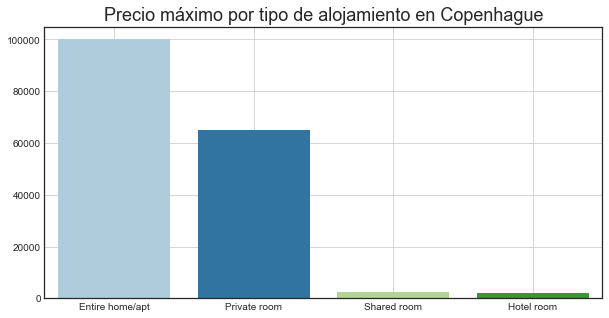

In [ ]:
# PRECIO MÁX POR ALOJAMIENTO
d = copenhague.groupby('room_type')[['price']].max().reset_index().sort_values(by=['price'], ascending=False) 
print(d)

plt.figure(figsize=(10, 5))
sns.barplot(x="room_type", y="price", data=d, palette='Paired')
plt.title('Precio máximo por tipo de alojamiento en Copenhague', fontsize= 18)
plt.grid()
plt.xlabel('')
plt.ylabel('');
plt.savefig('./img/precio_max_por_alojamiento_cop.png')

         room_type  price
0  Entire home/apt     75
2     Private room    103
1       Hotel room    178
3      Shared room    250


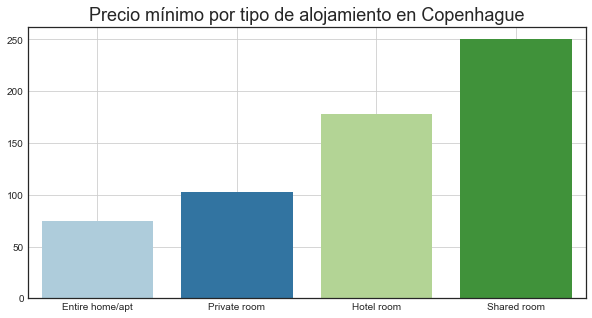

In [ ]:
# quiero ver el precio mínimo por alojamiento
d = copenhague.groupby('room_type')[['price']].min().reset_index().sort_values(by=['price'])
print(d)

plt.figure(figsize=(10, 5))
sns.barplot(x="room_type", y="price", data=d, palette='Paired')
plt.title('Precio mínimo por tipo de alojamiento en Copenhague', fontsize= 18)
plt.grid()
plt.xlabel('')
plt.ylabel('');
plt.savefig('./img/precio_min_por_alojamiento_cop.png') 

/Users/lauragarciasanchez/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



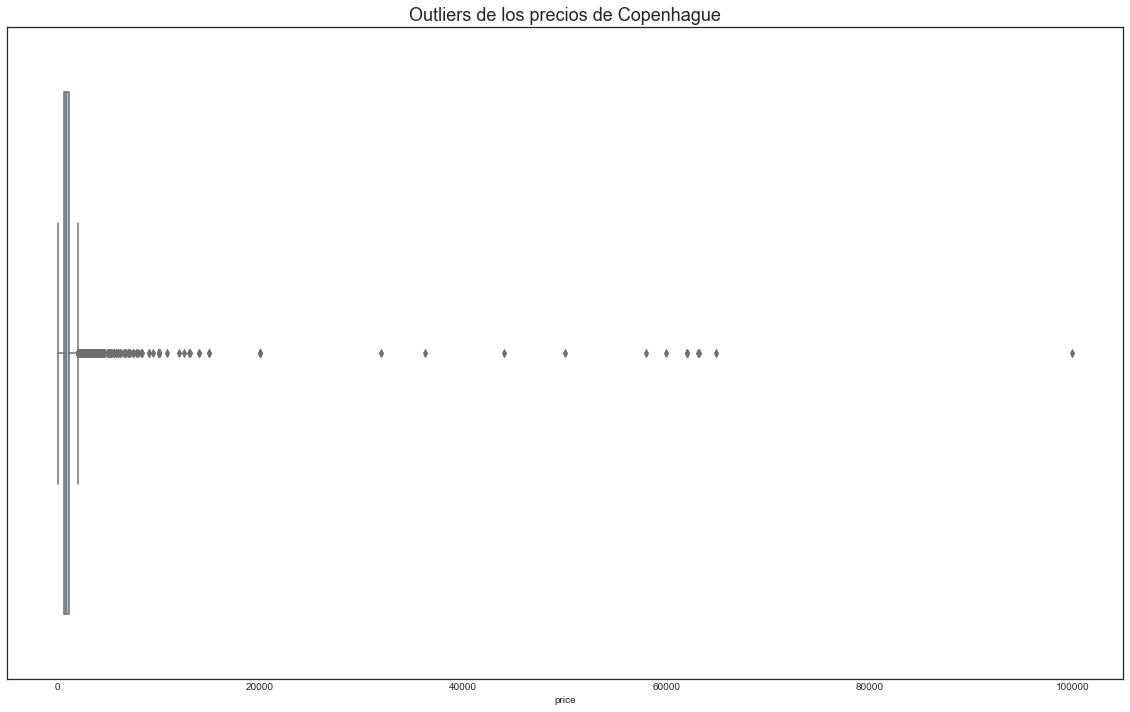

In [ ]:
# outliers de los precios
plt.figure(figsize=(20,12))
sns.boxplot(copenhague['price'], color= 'skyblue') 
plt.title('Outliers de los precios de Copenhague', fontsize= 18);
plt.savefig('./img/media_precio_boxplot_cop.png') 

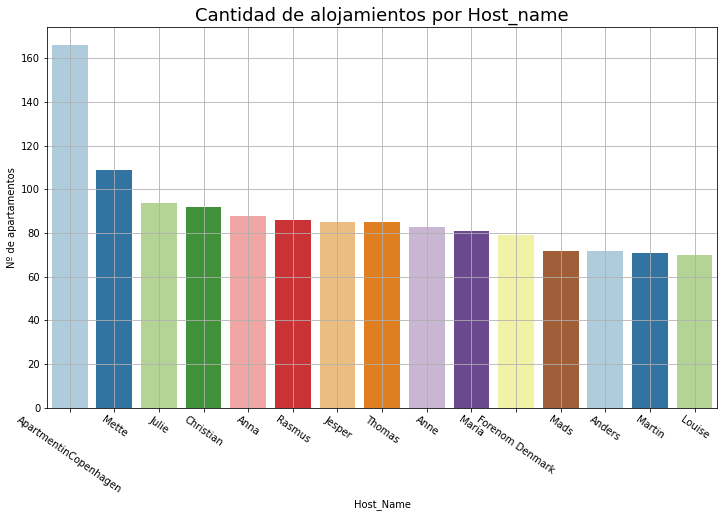

In [71]:
# Visualizo en con el host_name cuantos apartamentos tiene cada uno de ellos
host_name_apartamentos = pd.DataFrame({'Host_Name':copenhague['host_name'].value_counts(ascending=False).index,
                               'Nº de apartamentos': copenhague['host_name'].value_counts(ascending=False).values})[:15]


plt.figure(figsize=(12,7))
sns.barplot(x='Host_Name', y='Nº de apartamentos', data = host_name_apartamentos, palette='Paired')
plt.title('Cantidad de alojamientos por Host_name', fontsize= 18)
plt.xticks(rotation = -35)
plt.grid()
#plt.savefig('./img/alojamientos_host_name_cop.png') 

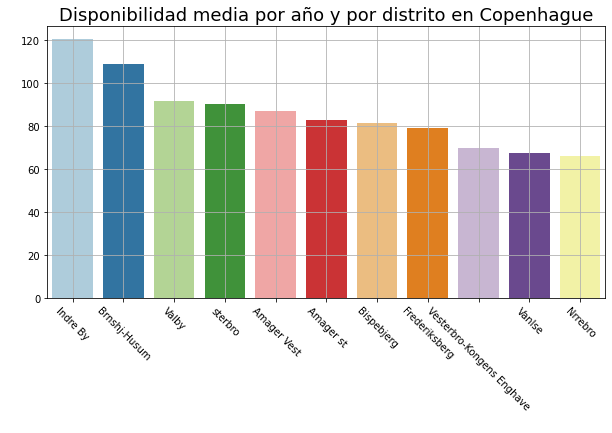

In [72]:
# analizo la disponibilidad media por distrito
d = copenhague.groupby('neighbourhood')[['availability_365']].mean().reset_index().sort_values(by=['availability_365'], ascending=False)  
d
plt.figure(figsize=(10, 5))
sns.barplot( x="neighbourhood",y="availability_365", data=d, palette='Paired')
plt.grid()
plt.ylabel(" ")
plt.xlabel(" ")
plt.xticks(rotation = -45);
plt.title('Disponibilidad media por año y por distrito en Copenhague', fontsize= 18);
#plt.savefig('disponiblidad_distrito.png')

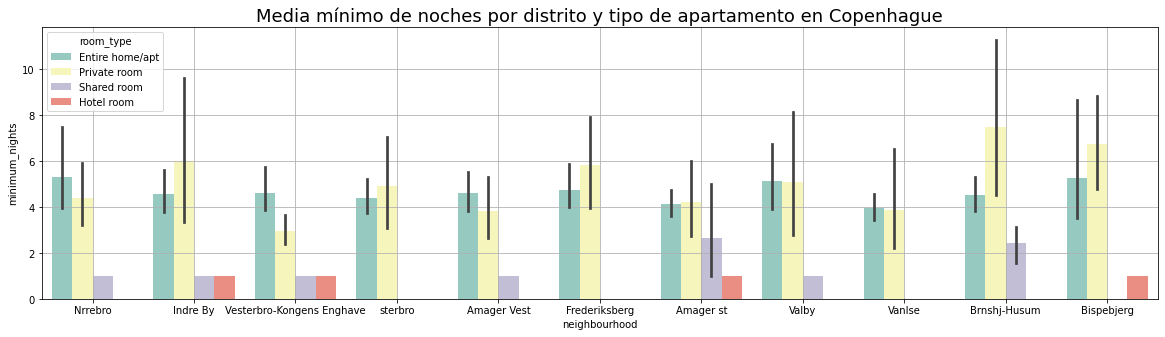

In [73]:
# quiero saber por tipo de apartamento y en que distrito, lo minimo que piden por noche, veo q en las habitaciones compartidas es lo que mas piden

plt.figure(figsize=(20, 5))
sns.barplot( x="neighbourhood",y="minimum_nights", hue = 'room_type',data=copenhague, palette='Set3')
plt.grid()
#plt.xticks(rotation = -45);
plt.title('Media mínimo de noches por distrito y tipo de apartamento en Copenhague', fontsize= 18);
#plt.savefig('minnoches_distrito_room_type.png')

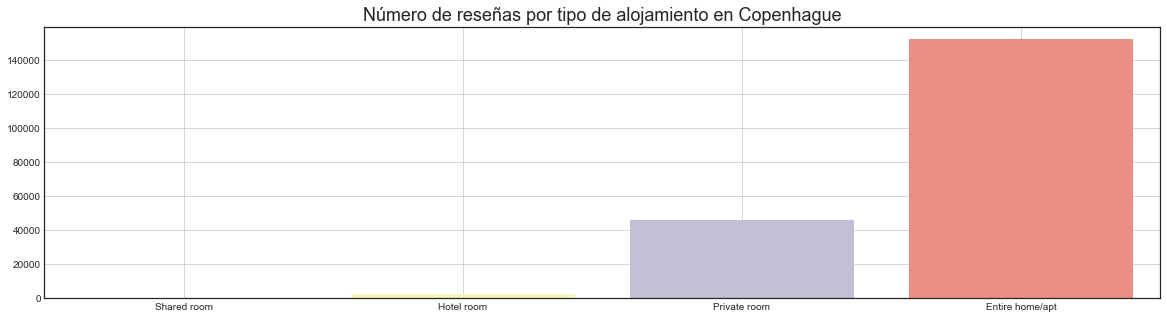

In [ ]:
# visualizo por separado el numero de reseñas por tipo de alojamiento
d = copenhague.groupby('room_type', )[['number_of_reviews']].sum().reset_index().sort_values(by=['number_of_reviews'], ascending=True)
print(d) 
plt.figure(figsize=(20, 5))
sns.barplot( x="room_type",y="number_of_reviews",data=d, palette='Set3')
plt.grid()
plt.xlabel('')
plt.ylabel('');
plt.title('Número de reseñas por tipo de alojamiento en Copenhague', fontsize= 18);
#plt.savefig('numreseñas_distrito_room_type.png')

                neighbourhood  number_of_reviews
5                    Indre By              49644
9   Vesterbro-Kongens Enghave              37683
6                     Nrrebro              29233
0                 Amager Vest              17674
4               Frederiksberg              17292
10                    sterbro              15966
1                   Amager st              14480
2                  Bispebjerg               6195
8                      Vanlse               5148
7                       Valby               5036
3                Brnshj-Husum               2713
201064


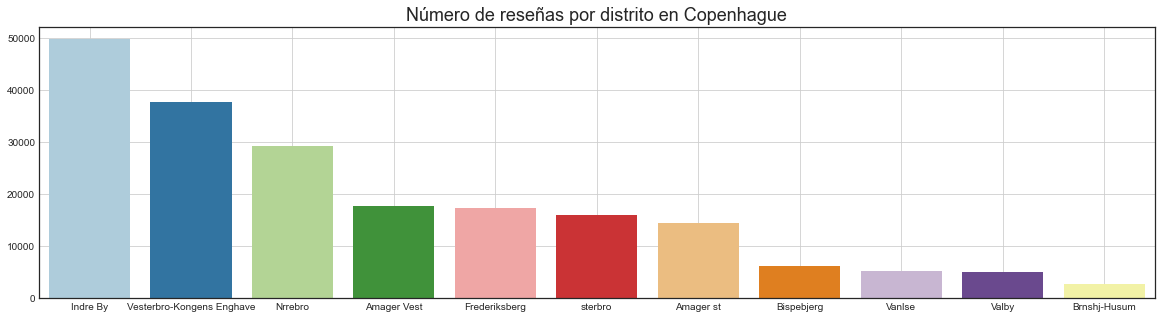

In [ ]:
# visualizo por separado el numero de reseñas por distrito
d = copenhague.groupby('neighbourhood', )[['number_of_reviews']].sum().reset_index().sort_values(by=['number_of_reviews'], ascending=False)
print(d)  
print(copenhague.number_of_reviews.sum())
plt.figure(figsize=(20, 5))
sns.barplot( x="neighbourhood",y="number_of_reviews", data=d, palette='Paired')
plt.grid()
#plt.xticks(rotation = -45);
plt.title('Número de reseñas por distrito en Copenhague', fontsize= 18)
plt.xlabel('')
plt.ylabel('');
plt.savefig('./img/numreseñas_distrito_cop.png') 

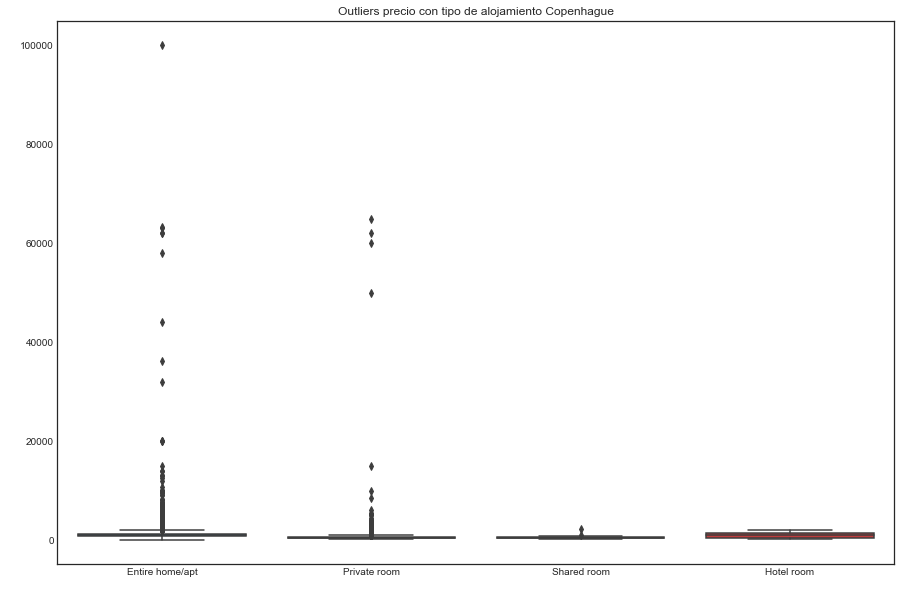

<Figure size 432x288 with 0 Axes>

In [ ]:
# outliers precio con tipo de alojamiento
plt.figure(figsize=(15,10))
sns.boxplot(data=copenhague, x='room_type', y='price')
plt.title('Outliers precio con tipo de alojamiento Copenhague')
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()
plt.savefig('./outlier_precio_room_type.png') 

# Mapas

In [75]:
# preparo dataframe para hacer el mapa por barrios
lat = pd.pivot_table(copenhague, index= 'neighbourhood', values='latitude').reset_index()
print(lat)
lon = pd.pivot_table(copenhague, index= 'neighbourhood', values='longitude').reset_index()
print(lon)
mapa_barrios = pd.merge(lat, lon)

                neighbourhood   latitude
0                 Amager Vest  55.651220
1                   Amager st  55.658702
2                  Bispebjerg  55.708364
3                Brnshj-Husum  55.708601
4               Frederiksberg  55.681469
5                    Indre By  55.681478
6                     Nrrebro  55.693949
7                       Valby  55.661253
8                      Vanlse  55.690452
9   Vesterbro-Kongens Enghave  55.664259
10                    sterbro  55.706516
                neighbourhood  longitude
0                 Amager Vest  12.586362
1                   Amager st  12.617529
2                  Bispebjerg  12.531177
3                Brnshj-Husum  12.487758
4               Frederiksberg  12.533266
5                    Indre By  12.580181
6                     Nrrebro  12.550426
7                       Valby  12.504099
8                      Vanlse  12.493763
9   Vesterbro-Kongens Enghave  12.549124
10                    sterbro  12.578871


In [88]:
# en Copenhague solo está distribuido por barrios en Airbnb

In [82]:
map_geojson = folium.Map(location=[55.681478, 12.580181], zoom_start=11, width="%100",height="%100") 
mapa = folium.GeoJson("./neighbourhoods.geojson", name= "geojson airbnb").add_to(map_geojson)
folium.LayerControl().add_to(map_geojson)
map_geojson

In [84]:
# visualizo todo el mapa de Copenhague con los barrios marcados 
map_geojson = folium.Map(location=[55.681478, 12.580181], zoom_start=12,  width="%100",height="%100") 
mapa = folium.GeoJson("./neighbourhoods.geojson", name= "geojson airbnb").add_to(map_geojson)
folium.LayerControl().add_to(map_geojson)

for (index, row) in mapa_barrios.iterrows(): 
    folium.Marker(location = [row.loc["latitude"], row.loc["longitude"]],
    popup = row.loc["neighbourhood"],
    tooltip = "click").add_to(map_geojson)

mapa.save("./img/Mapa_geojson_cop_general_cop.htlm")
mapa.save("Mapa_geojson.jpg");
map_geojson

In [87]:
# VIsualización por distritos
mapa_distritos
map_dist = folium.Map(location=[55.681478, 12.580181], zoom_start=12, width="%100",height="%100")

for (index, row) in mapa_barrios.iterrows(): 
    folium.Marker(location = [row.loc["latitude"], row.loc["longitude"]],
    popup = row.loc["neighbourhood"],
    tooltip = "click").add_to(map_dist)

mapa.save("./img/Mapa_geojson_cop_suelo_general_cop.htlm")
map_dist